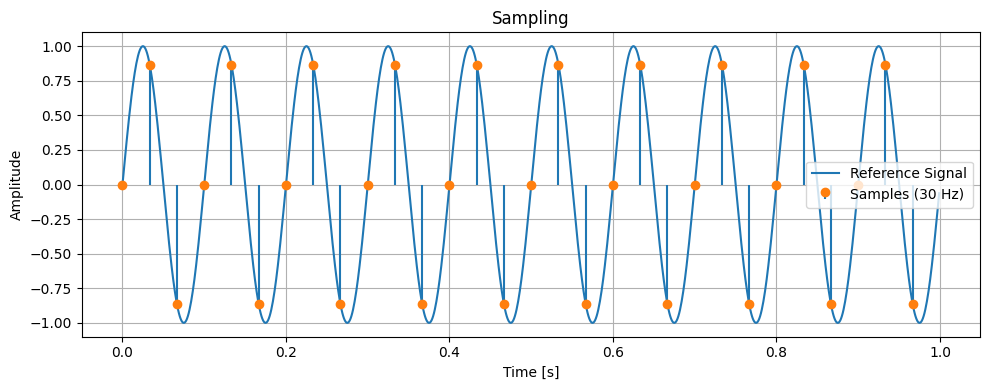

MSE rekonstrukcji = 3.898e-30


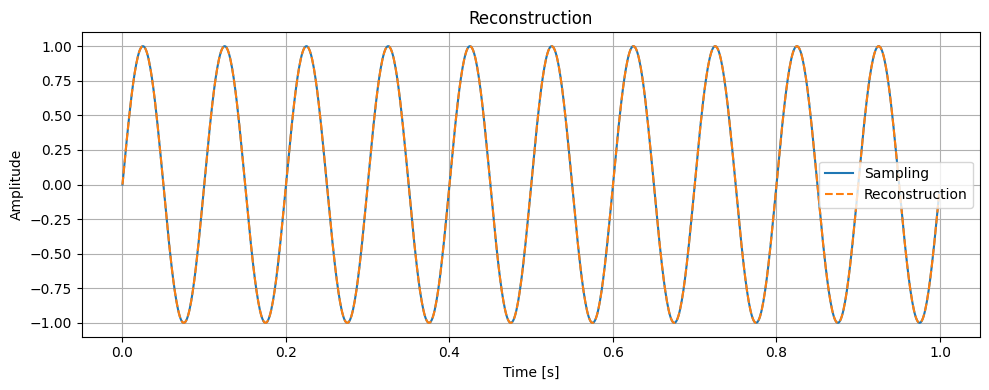

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

def reconstruct(fs, f_signal=10, duration=1.0, fs_ref=1000):

  
    t_ref = np.linspace(0, duration, int(fs_ref*duration), endpoint=False)
    x_ref = np.sin(2 * np.pi * f_signal * t_ref)
    

    t_samp = np.arange(0, duration, 1 / fs)
    x_samp = np.sin(2 * np.pi * f_signal * t_samp)
    

    plt.figure(figsize=(10, 4))
    plt.plot(t_ref, x_ref, label='Reference Signal')
    plt.stem(t_samp, x_samp, basefmt=' ', markerfmt='C1o',
             label=f'Samples ({fs} Hz)')
    plt.title('Sampling')
    plt.xlabel('Time [s]'); plt.ylabel('Amplitude')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()
    
   
    x_recon = resample(x_samp, len(t_ref))
    
    mse = np.mean((x_ref - x_recon) ** 2)
    print(f'MSE rekonstrukcji = {mse:.3e}')
    
    plt.figure(figsize=(10, 4))
    plt.plot(t_ref, x_ref, label='Sampling')
    plt.plot(t_ref, x_recon, '--', label='Reconstruction')
    plt.title('Reconstruction')
    plt.xlabel('Time [s]'); plt.ylabel('Amplitude')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()
    
reconstruct(fs=30)   


In [27]:

x = np.array([10, 20, 30, 40, 50, 60], dtype=float)
print("x =", x)

coeffs = dct(x, type=2, norm="ortho")
print("DCT coeffs =", coeffs)

threshold = 15
coeffs_thr = coeffs.copy()
coeffs_thr[np.abs(coeffs_thr) < threshold] = 0
print("Po progu 15:", coeffs_thr)

x_rec = idct(coeffs_thr, type=2, norm="ortho")
print("x_rec =", x_rec)


mse = np.mean((x - x_rec) ** 2)
print(f"MSE = {mse:.3e}")



x = [10. 20. 30. 40. 50. 60.]
DCT coeffs = [ 85.732141   -41.62561796   0.          -4.0824829    0.
  -0.80078891]
Po progu 15: [ 85.732141   -41.62561796   0.           0.           0.
   0.        ]
x_rec = [11.78632795 18.00641263 28.77991532 41.22008468 51.99358737 58.21367205]
MSE = 2.885e+00
